# Imoprt the necessary libraries

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p >Import the necessary libraries</p>

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Read the car data**

In [2]:
df=pd.read_csv("/kaggle/input/car-data/CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**Lets check the shape of dataset**

In [4]:
df.shape

(205, 26)

In [5]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


* **From the above corr() we can see how strongly the other properties dependent on Price column.**

<AxesSubplot:>

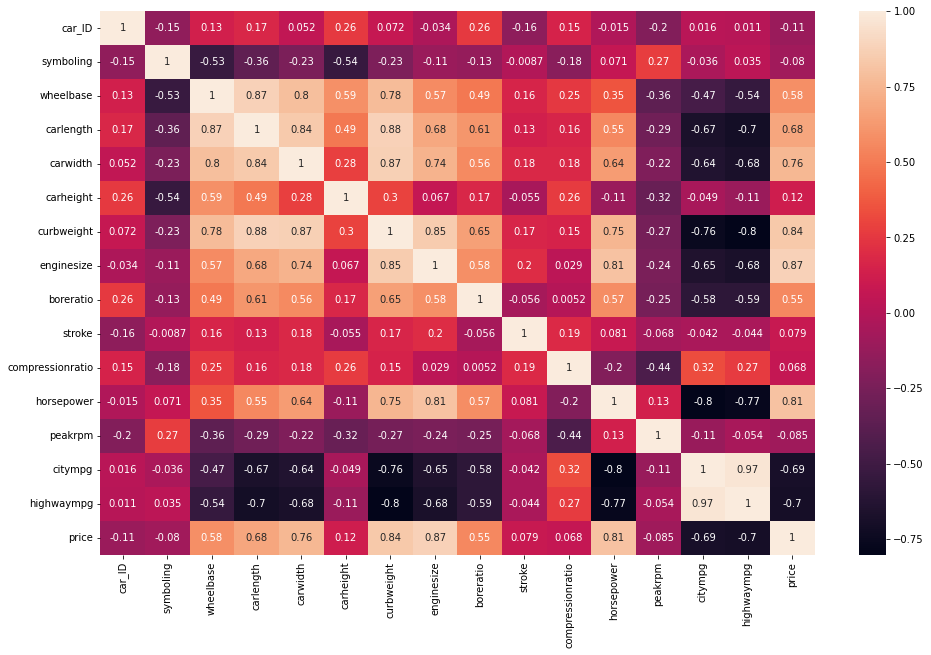

In [6]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

* **From the heatmap we can see that enginesize and curbweight strongly helps in predicting the price.**

In [7]:
df.duplicated().sum()

0

* **No duplicate rows**

**Checking the null value counts**

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

**Cleaning the Car name column by taking only brand name by removing model name**

In [11]:
df.CarName=df.CarName.apply(lambda x:x.split(" ")[0])

In [12]:
df.CarName

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [13]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**From the above, we can see that car names having spelling mistakes. So will replace with proper brand name of Car.**

**Function to correcting the names**

In [14]:
def correct_name(value):
    dict={"toyouta":"toyota","Nissan":"nissan","maxda":"mazda","vokswagen":"volkswagen","porcshce":"porsche"}
    if value in dict.keys():
        return dict[value]
    else:
        return value

In [15]:
df.CarName=df.CarName.apply(correct_name)

In [16]:
df.CarName.value_counts(normalize=True)*100

toyota         15.609756
nissan          8.780488
mazda           8.292683
mitsubishi      6.341463
honda           6.341463
subaru          5.853659
peugeot         5.365854
volvo           5.365854
volkswagen      4.878049
dodge           4.390244
buick           3.902439
bmw             3.902439
audi            3.414634
plymouth        3.414634
saab            2.926829
porsche         2.439024
isuzu           1.951220
jaguar          1.463415
chevrolet       1.463415
alfa-romero     1.463415
renault         0.975610
vw              0.975610
mercury         0.487805
Name: CarName, dtype: float64

**We can see that most people preferred to buy Toyota company Car**

In [17]:
avg_price_bycarName=df.groupby(["CarName"]).mean()["price"].sort_values()

In [18]:
df_CarName=pd.DataFrame(avg_price_bycarName)
df_CarName["CarName"]=df_CarName.index
df_CarName.reset_index(drop=True,inplace=True)
df_CarName=df_CarName.iloc[:,[1,0]]
df_CarName

,CarName,price
0,chevrolet,6007.000000
1,dodge,7875.444444
2,plymouth,7963.428571
3,honda,8184.692308
4,subaru,8541.250000
5,isuzu,8916.500000
6,mitsubishi,9239.769231
7,renault,9595.000000
8,toyota,9885.812500
9,volkswagen,9935.500000


* **Most of them preferred to buy Toyota which is of average price around *9885$***
* We can observe that most preferred to buy middle range Cars

In [19]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [20]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [21]:
avg_price_bysymboling=df.groupby(["symboling"]).mean()["price"].sort_values()

In [22]:
df_sym=pd.DataFrame(avg_price_bysymboling)
df_sym["symboling"]=df_sym.index
df_sym.reset_index(drop=True,inplace=True)
df_sym=df_sym.iloc[:,[1,0]]
df_sym

,symboling,price
0,1,10037.907407
1,2,10109.281250
2,0,14366.965179
3,-2,15781.666667
4,3,17221.296296
5,-1,17330.681818


* **Symboling(1) has lowest average price.**

In [23]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [24]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [25]:
avg_price_byfueltype=df.groupby(["fueltype"])["price"].mean()

In [26]:
avg_price_byfueltype

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

* **Most preferred to buy gas type Cars,becuase of lowest Price**

In [27]:
df_fueltype=pd.DataFrame(avg_price_byfueltype)
df_fueltype["fueltype"]=df_fueltype.index
df_fueltype.reset_index(drop=True,inplace=True)
df_fueltype=df_fueltype.iloc[:,[1,0]]
df_fueltype

,fueltype,price
0,diesel,15838.1500
1,gas,12999.7982


In [28]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [29]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [30]:
avg_price_byasp=df.groupby(["aspiration"])["price"].mean()

In [31]:
avg_price_byasp

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

* **Aspiration type std has most counts**

In [32]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [33]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [34]:
avg_rpice_bydrnum=df.groupby(["doornumber"])["price"].mean()

In [35]:
avg_rpice_bydrnum

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

**Usually evryone preferred to buy 4 door Cars irrespctive of Price.**

In [36]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [37]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [38]:
avg_price_bycarbody=df.groupby(["carbody"])["price"].mean()

In [39]:
avg_price_bycarbody.sort_values()

carbody
hatchback      10376.652386
wagon          12371.960000
sedan          14344.270833
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float64

In [40]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [41]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [42]:
avg_price_bywd=df.groupby(["drivewheel"])["price"].mean()

In [43]:
avg_price_bywd.sort_values()

drivewheel
fwd     9239.308333
4wd    11087.463000
rwd    19910.809211
Name: price, dtype: float64

In [44]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [45]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [46]:
avg_price_byengloc=df.groupby(["enginelocation"])["price"].mean()

In [47]:
avg_price_byengloc.sort_values()

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64

In [48]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [49]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [50]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [51]:
avg_price_bycylnum=df.groupby(["cylindernumber"])["price"].mean()

In [52]:
avg_price_bycylnum

cylindernumber
eight     37400.100000
five      21630.469727
four      10285.754717
six       23671.833333
three      5151.000000
twelve    36000.000000
two       13020.000000
Name: price, dtype: float64

***Inference***

**Most of them preferred**
* Most of them preferred to buy Toyota which is of average price around 9885 dollar
* We can observe that most preferred to buy middle range Cars
* Most preferred to buy gas type Cars,becuase of lowest Price
* Cars of body type Sedan with average price around 14344 dollar
* Cars of front wheel drive with average price 9239 $
* 99% people bought Cars with engine location at front
* Engine with 4 cylinders has more counts.



**Lets separate categorical data from original dataset.**

In [53]:
categorical_data=df[["symboling","CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","cylindernumber"]]

In [54]:
categorical_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,cylindernumber
0,3,alfa-romero,gas,std,two,convertible,rwd,front,four
1,3,alfa-romero,gas,std,two,convertible,rwd,front,four
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,six
3,2,audi,gas,std,four,sedan,fwd,front,four
4,2,audi,gas,std,four,sedan,4wd,front,five
...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,four
201,-1,volvo,gas,turbo,four,sedan,rwd,front,four
202,-1,volvo,gas,std,four,sedan,rwd,front,six
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,six


<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p >Data Visualization</p>

</div>

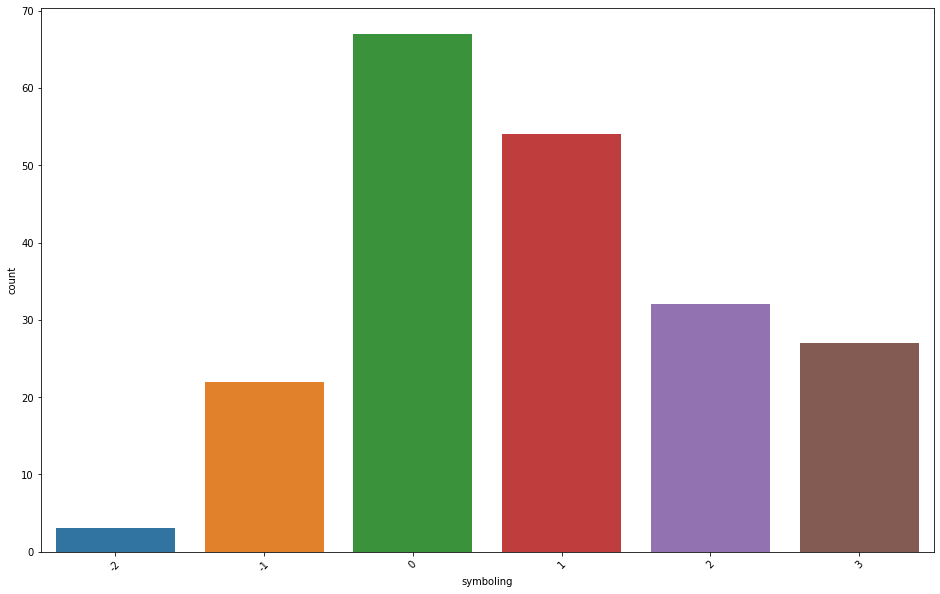

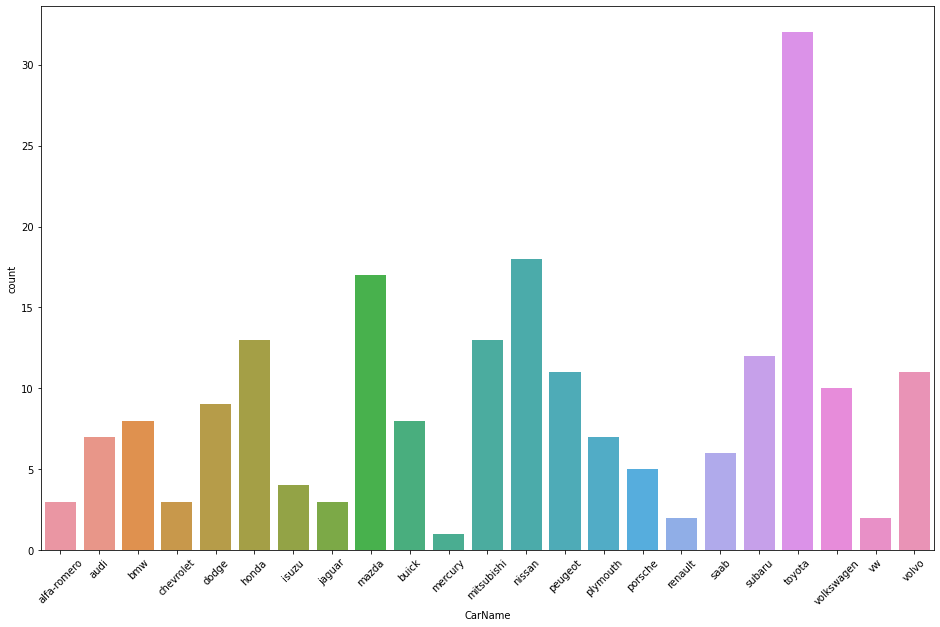

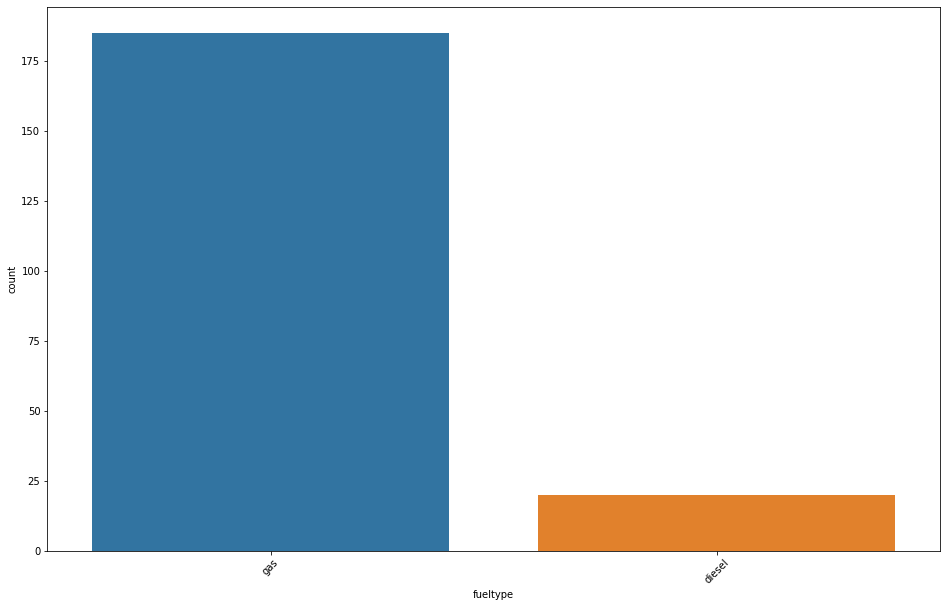

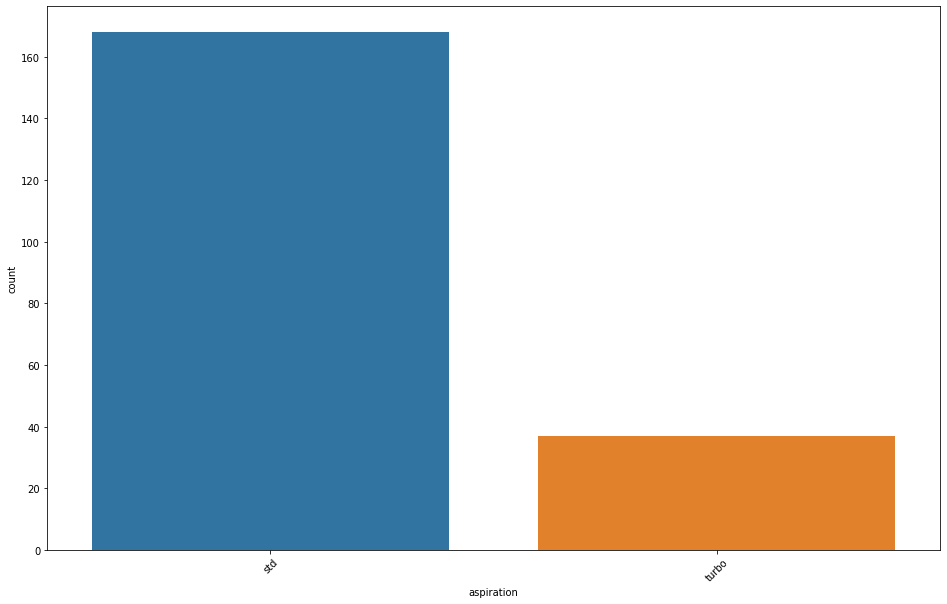

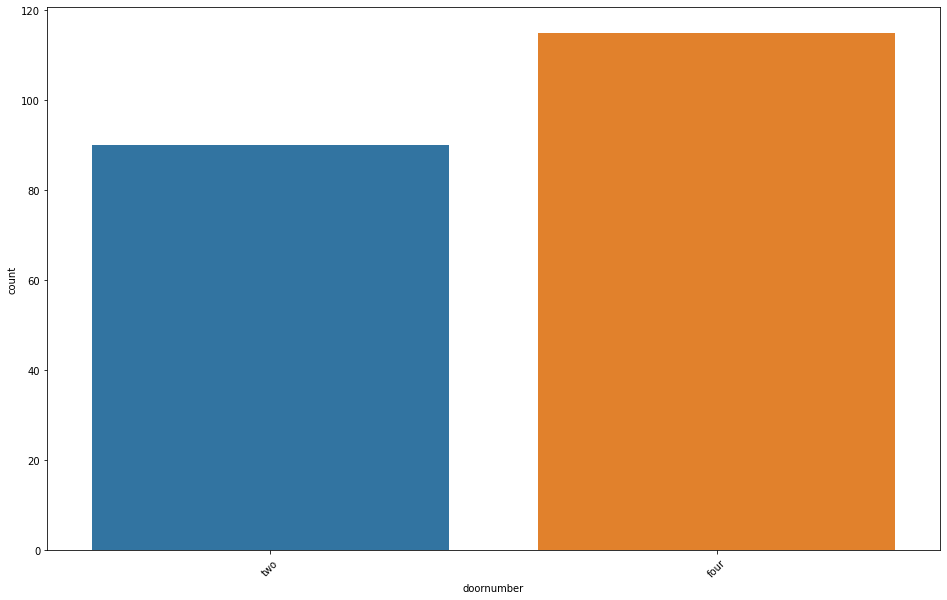

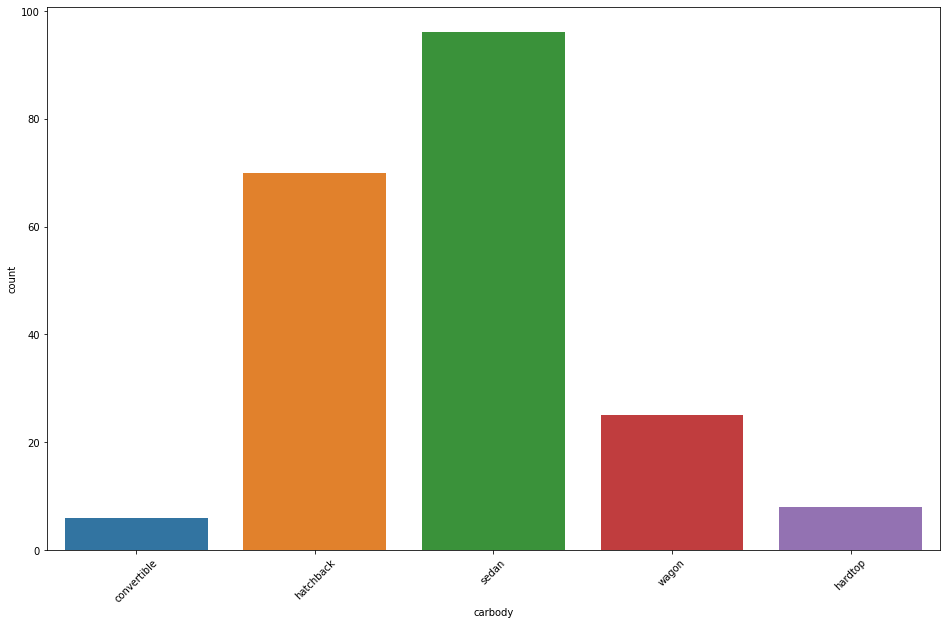

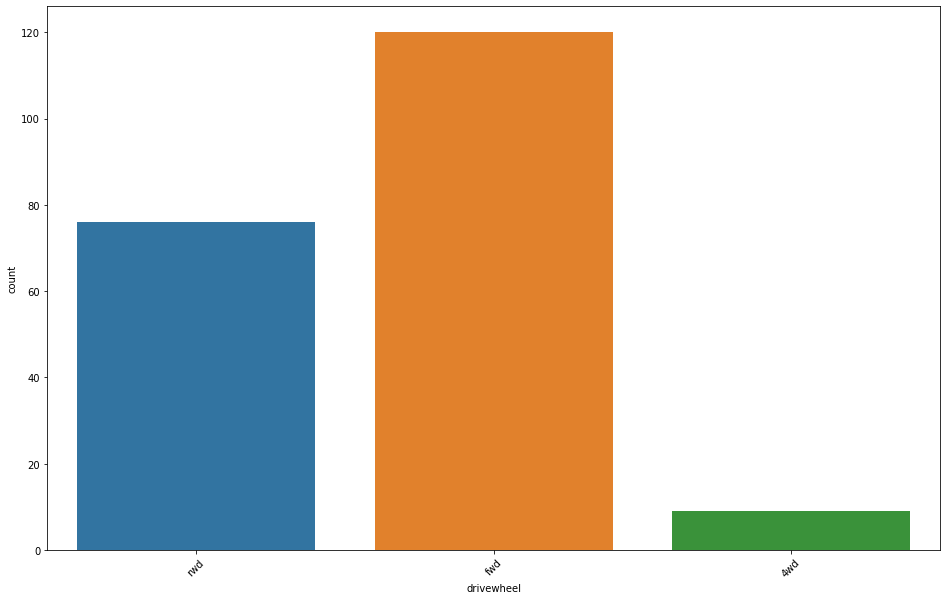

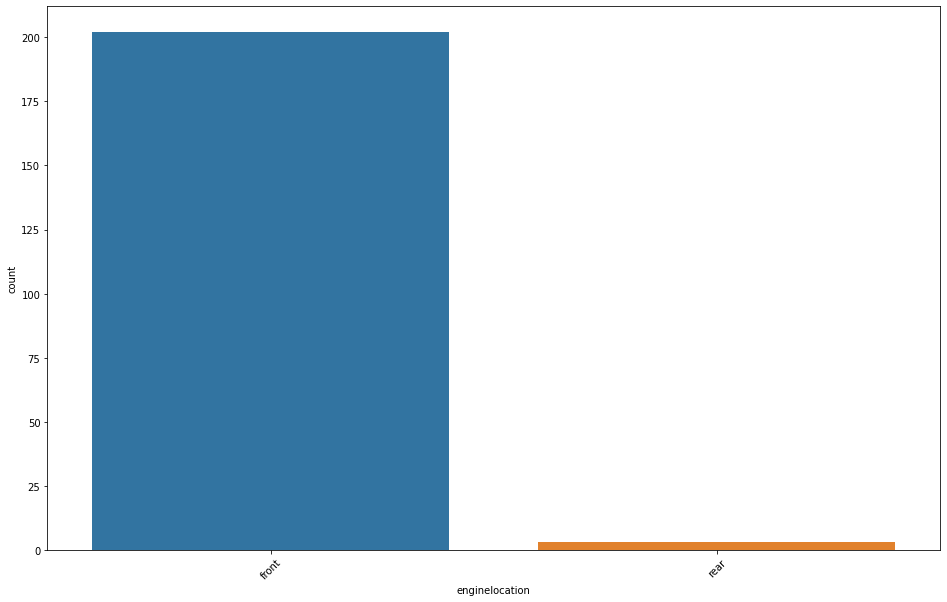

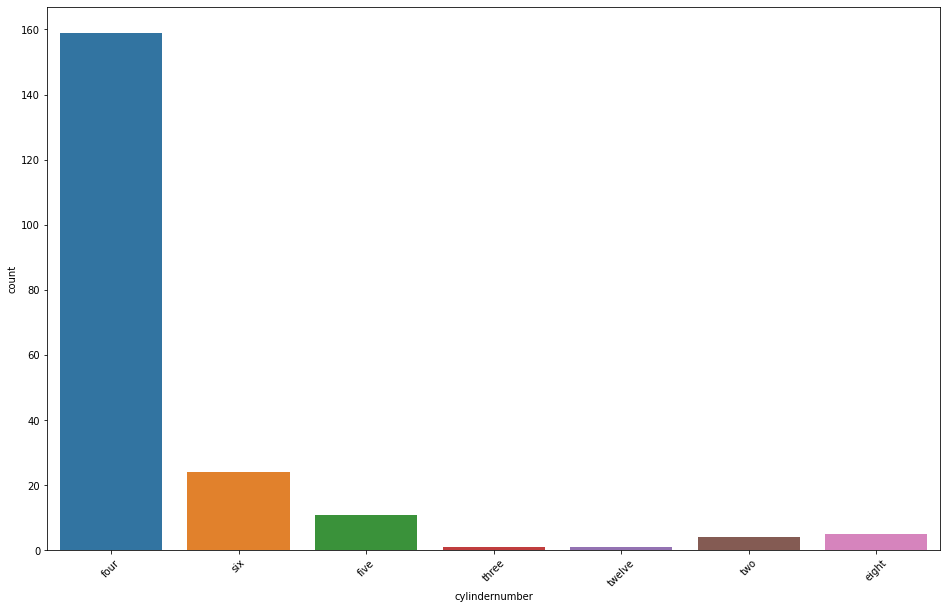

In [55]:
for column in categorical_data.columns:
    plt.figure(figsize=(16,10))
    sns.countplot(x=column,data=categorical_data)
    plt.xticks(rotation=45)

**Listing all the avg_price series.**

In [56]:
avg_price_columns=list([avg_price_bycarName,avg_price_bysymboling,avg_price_byfueltype,avg_price_byasp,avg_rpice_bydrnum,avg_price_bycarbody,avg_price_bywd,avg_price_byengloc,avg_price_bycylnum])

In [57]:
avg_price_columns

[CarName
 chevrolet       6007.000000
 dodge           7875.444444
 plymouth        7963.428571
 honda           8184.692308
 subaru          8541.250000
 isuzu           8916.500000
 mitsubishi      9239.769231
 renault         9595.000000
 toyota          9885.812500
 volkswagen      9935.500000
 nissan         10415.666667
 mazda          10652.882353
 vw             10787.500000
 saab           15223.333333
 peugeot        15489.090909
 alfa-romero    15498.333333
 mercury        16503.000000
 audi           17859.166714
 volvo          18063.181818
 bmw            26118.750000
 porsche        31400.500000
 buick          33647.000000
 jaguar         34600.000000
 Name: price, dtype: float64,
 symboling
  1    10037.907407
  2    10109.281250
  0    14366.965179
 -2    15781.666667
  3    17221.296296
 -1    17330.681818
 Name: price, dtype: float64,
 fueltype
 diesel    15838.1500
 gas       12999.7982
 Name: price, dtype: float64,
 aspiration
 std      12611.270833
 turbo    1629

**Bar plot for Properties vs Average Price**

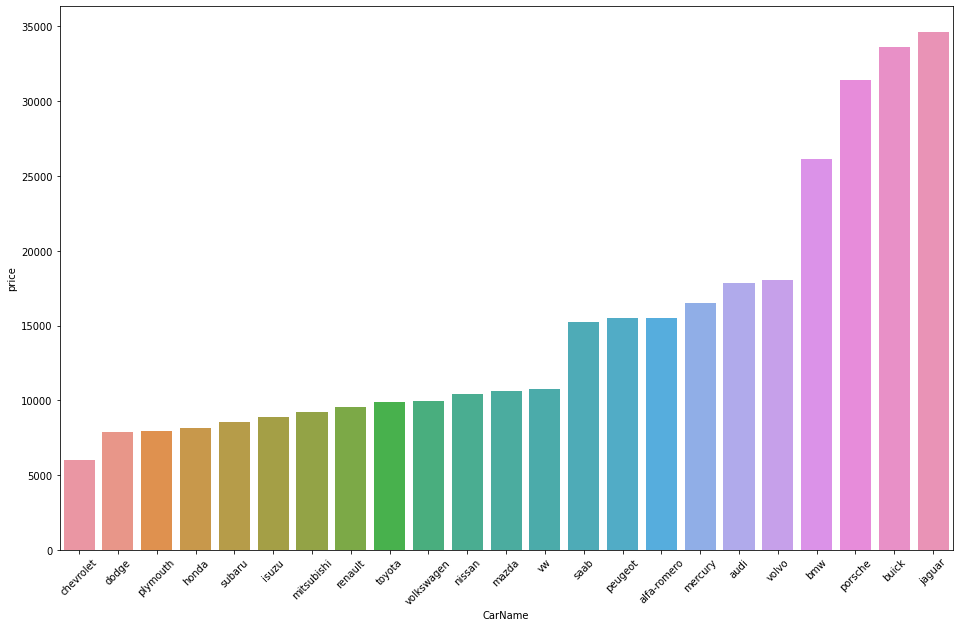

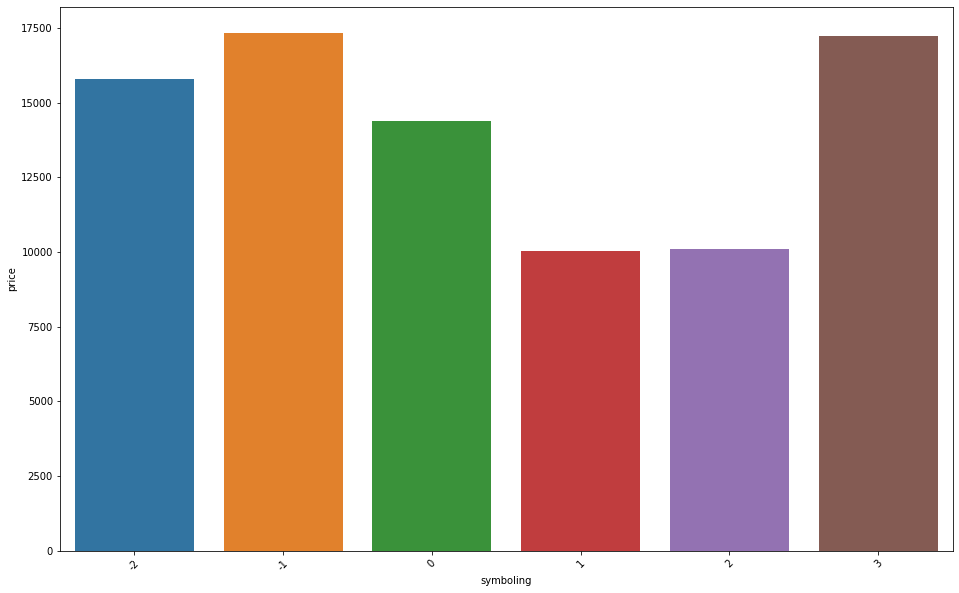

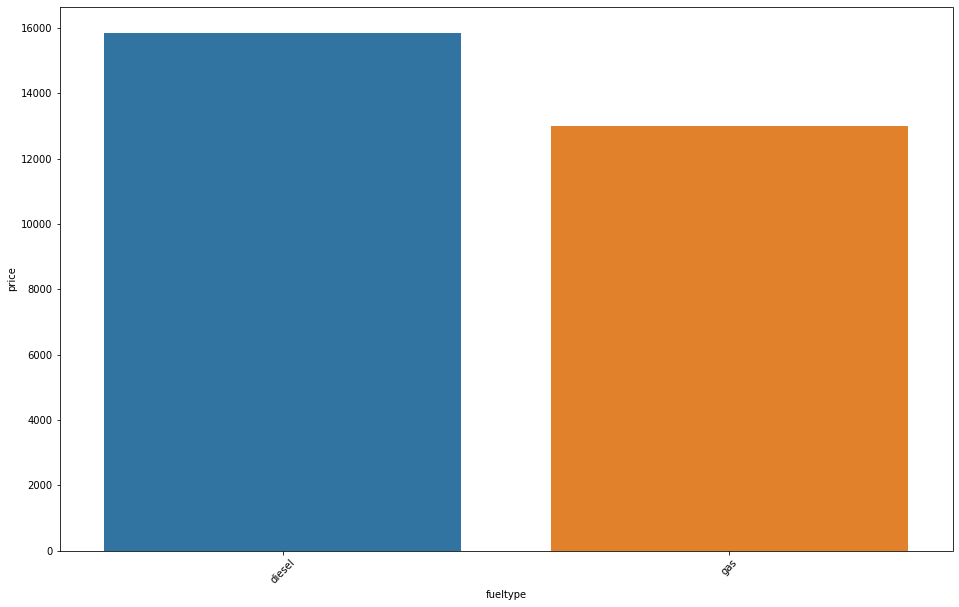

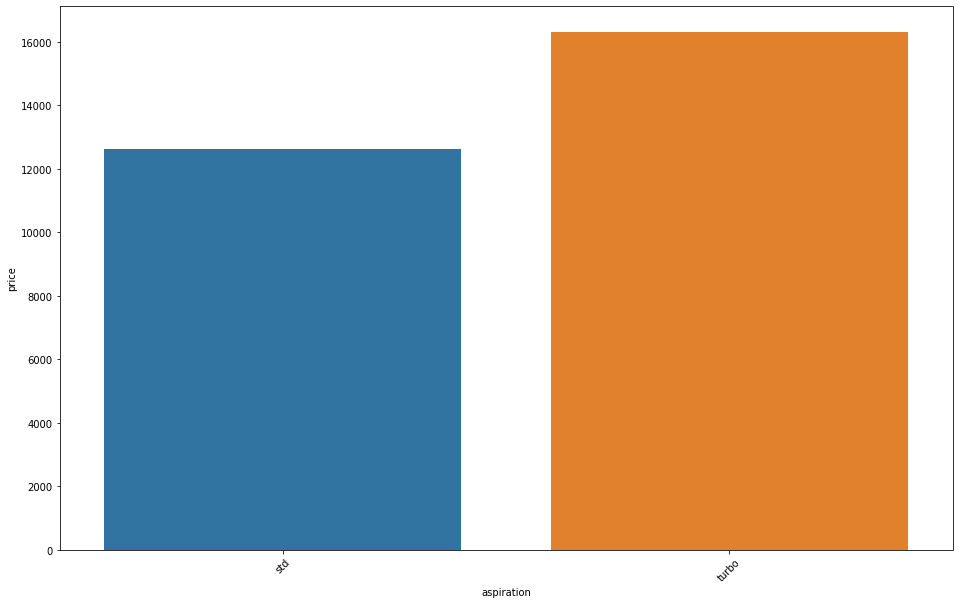

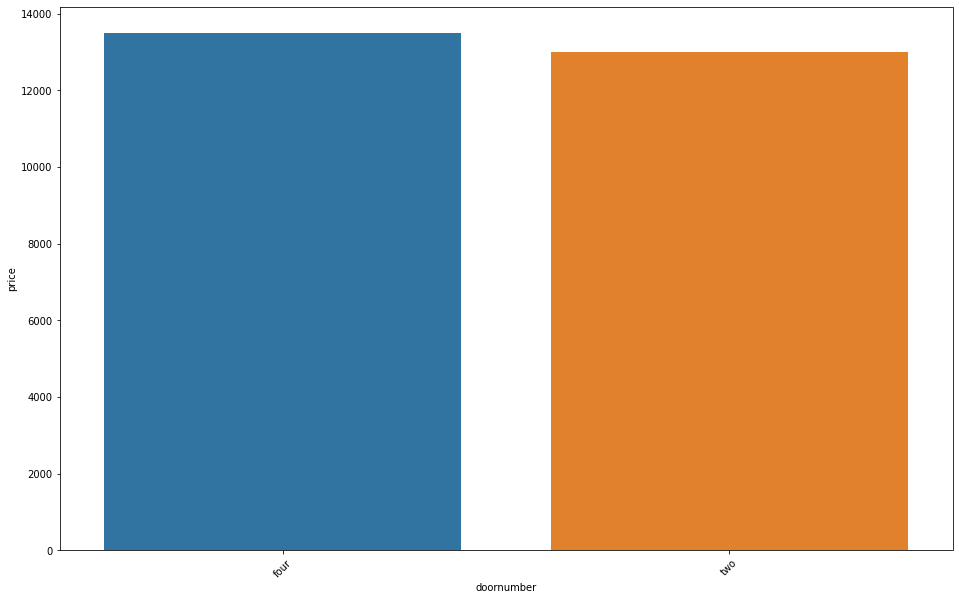

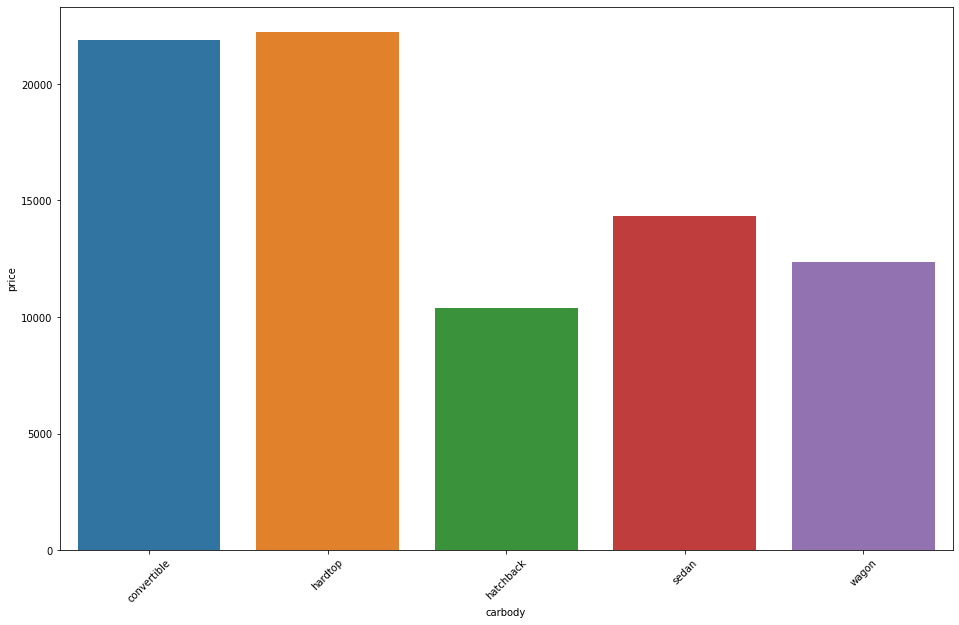

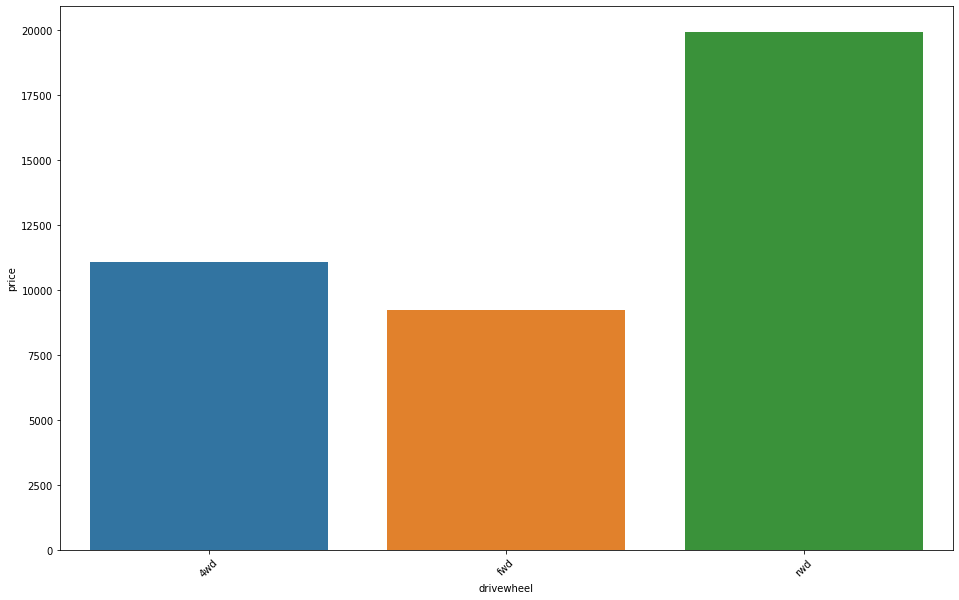

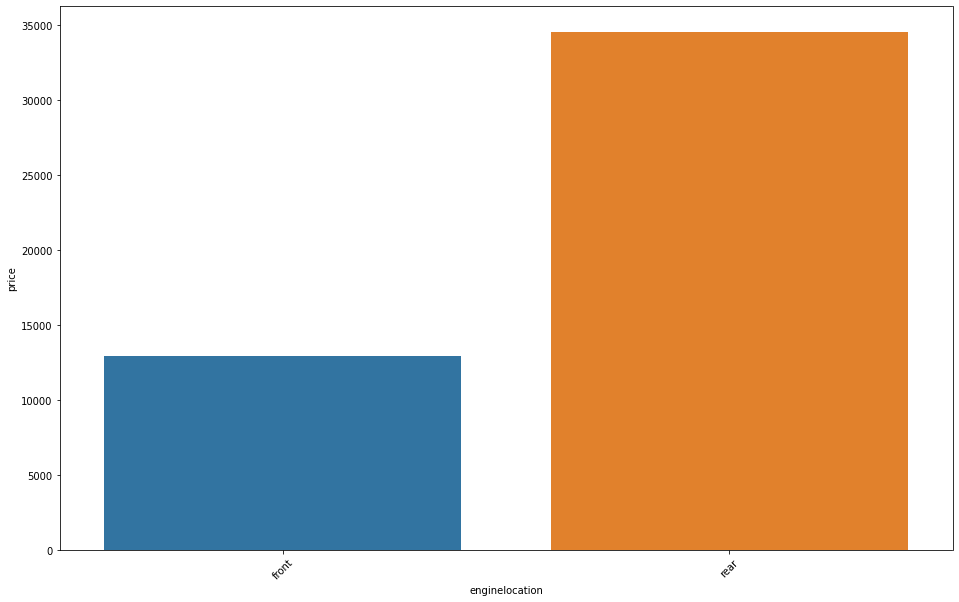

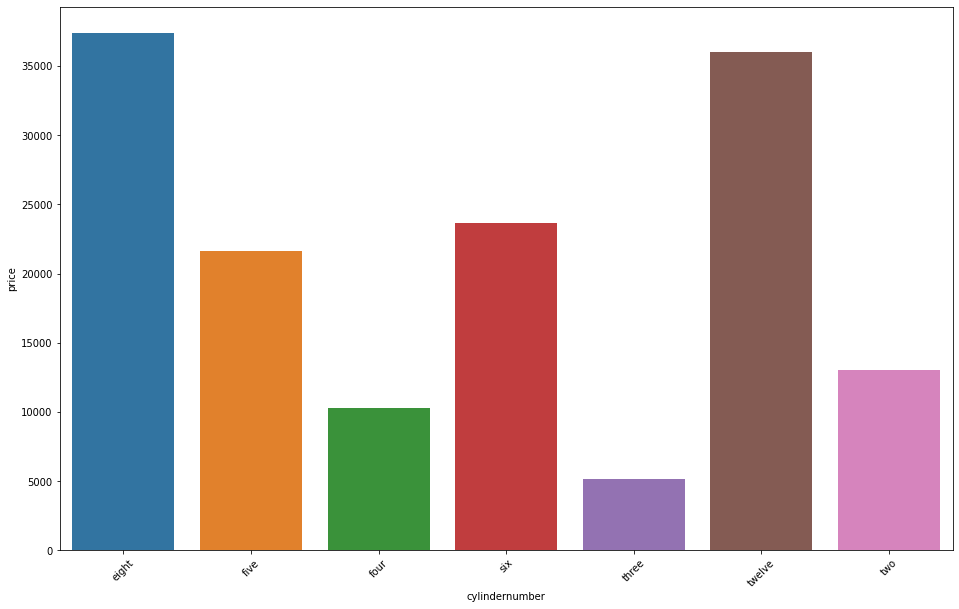

In [58]:
for i in avg_price_columns:
    plt.figure(figsize=(16,10))
    sns.barplot(x=i.index,y=i)
    plt.xticks(rotation=45)

In [59]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

**Lets separate Continous data**

In [60]:
continous_data=df[["wheelbase",'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

**Scatter plot for continous data against Price**

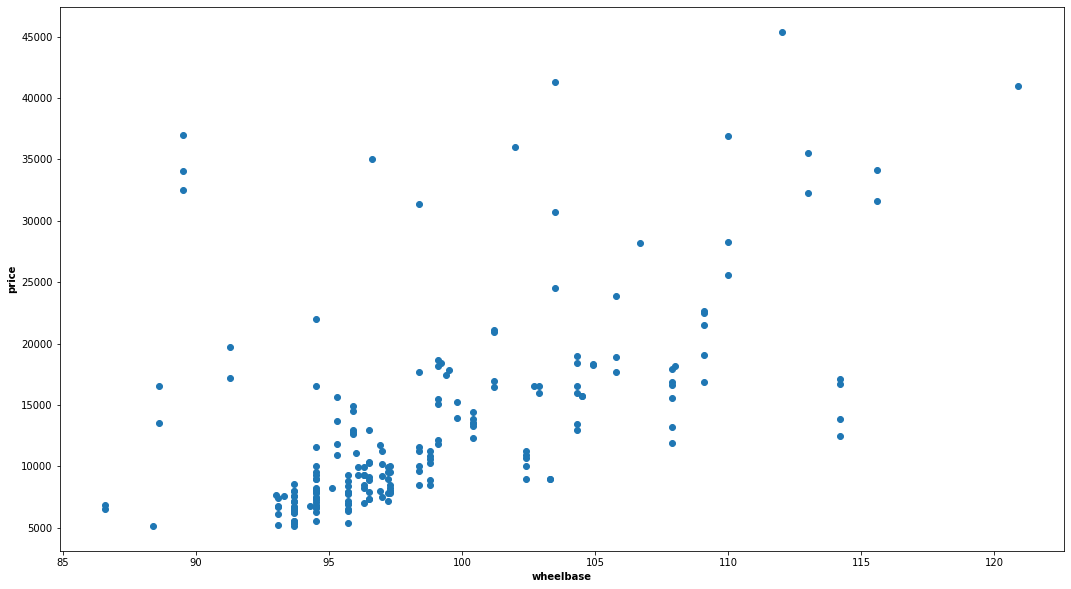

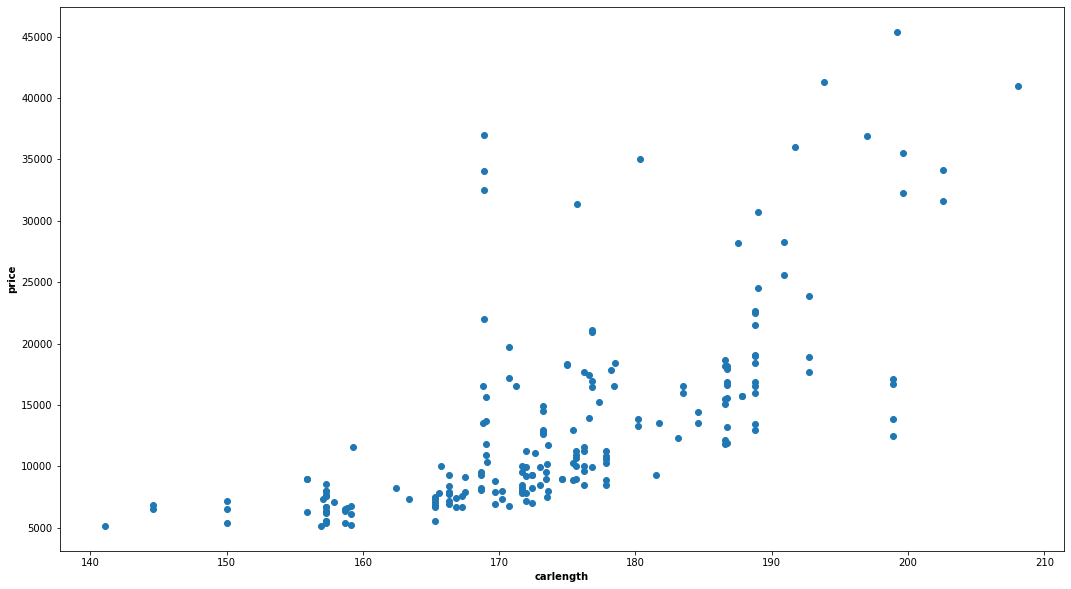

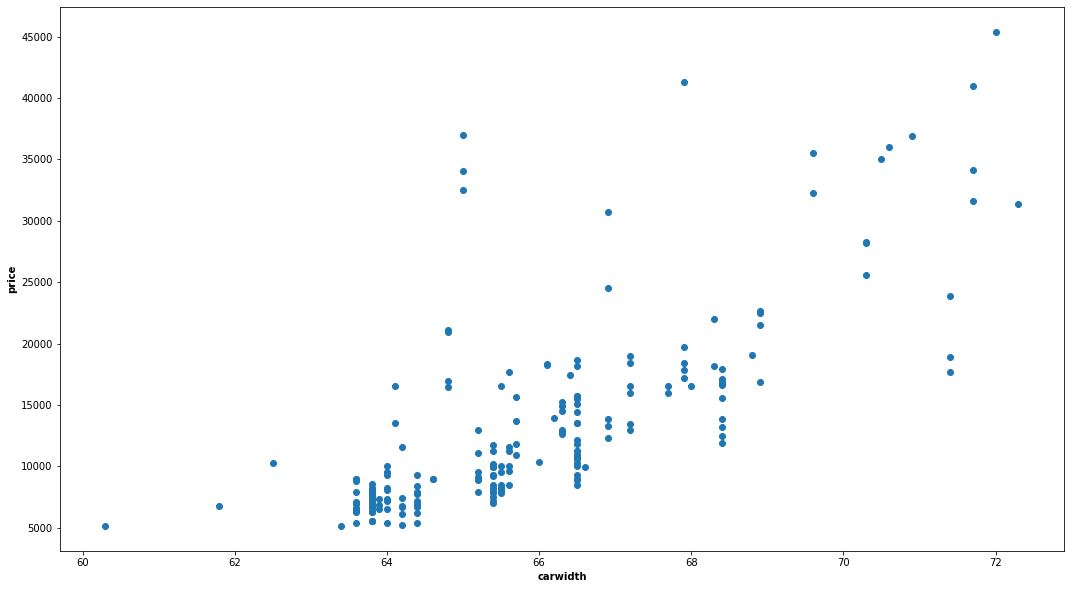

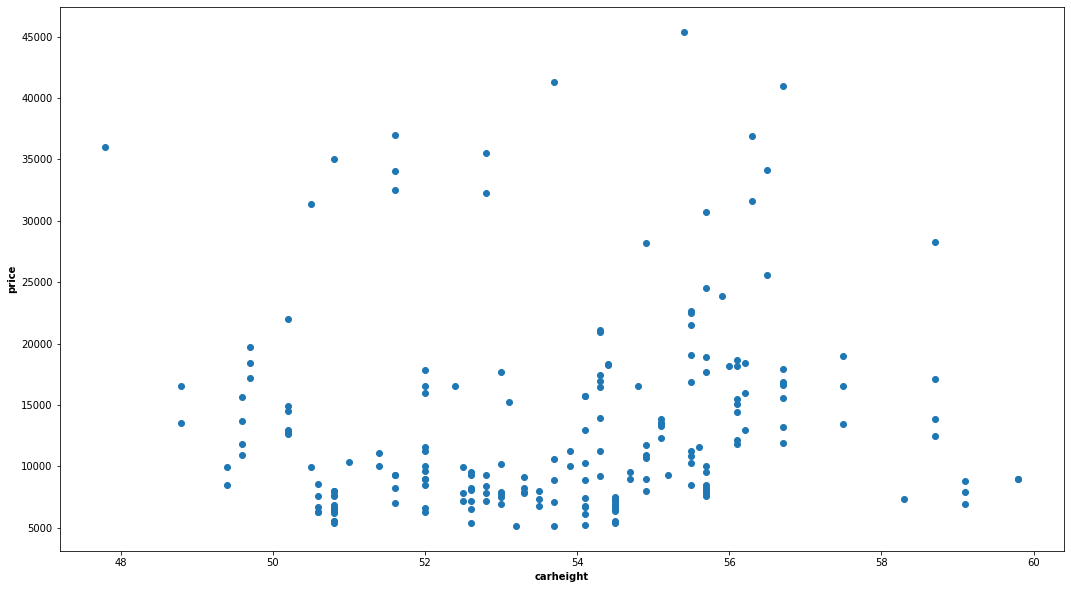

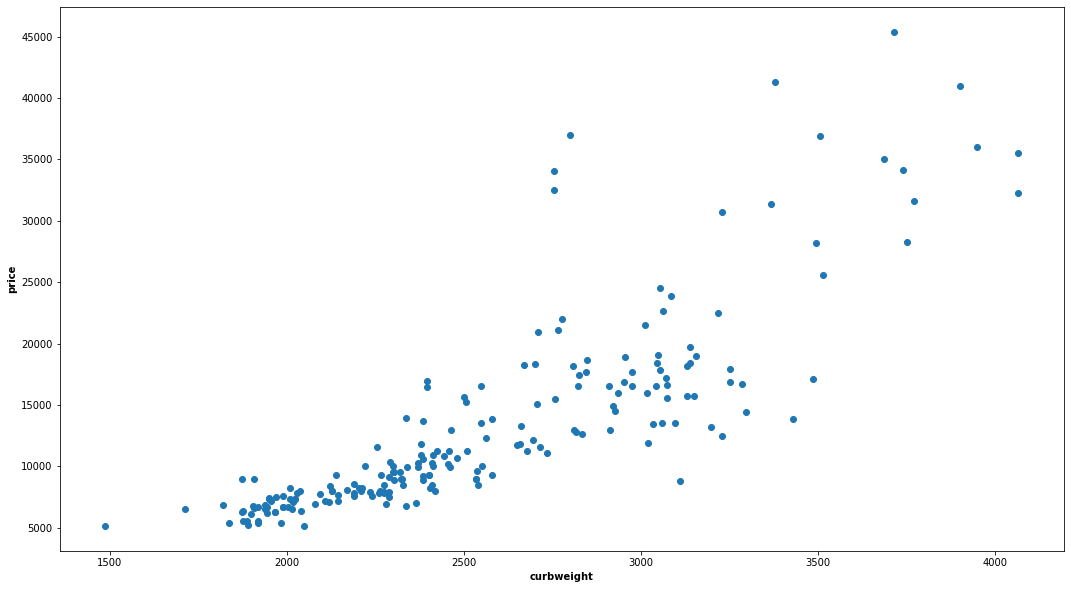

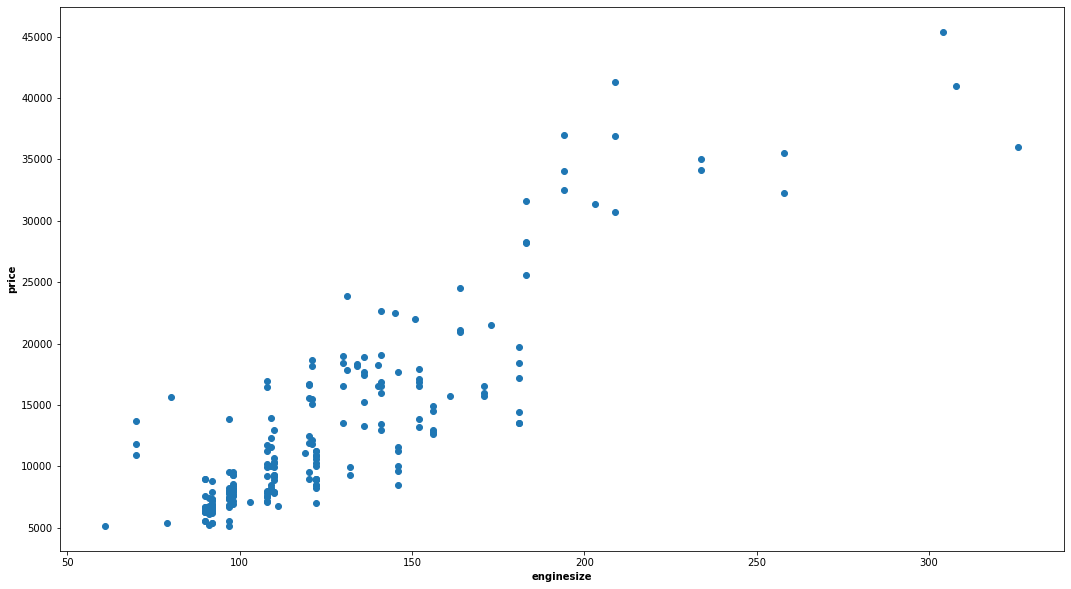

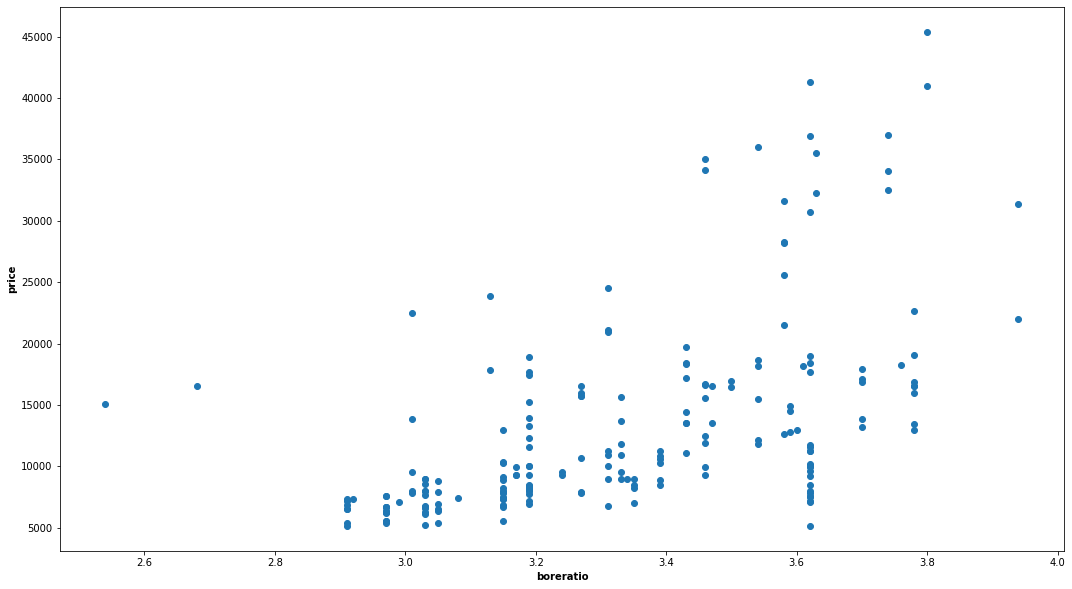

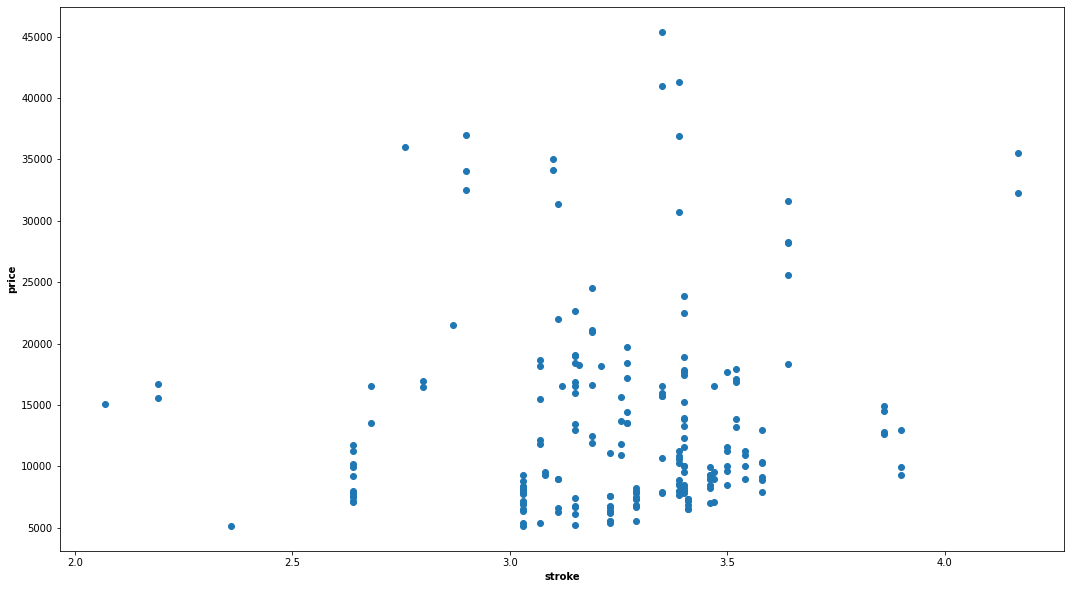

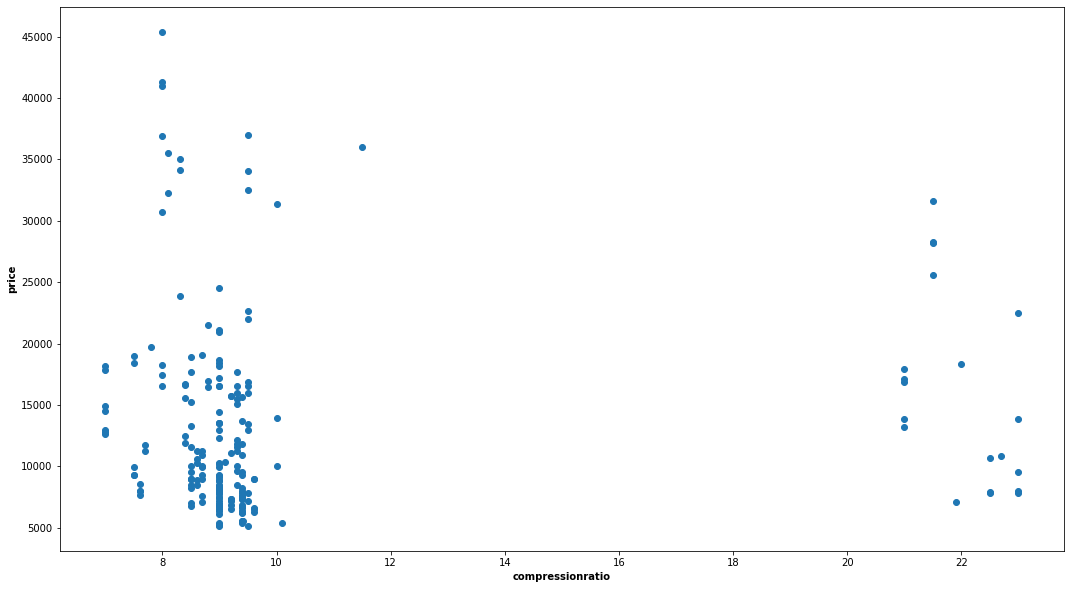

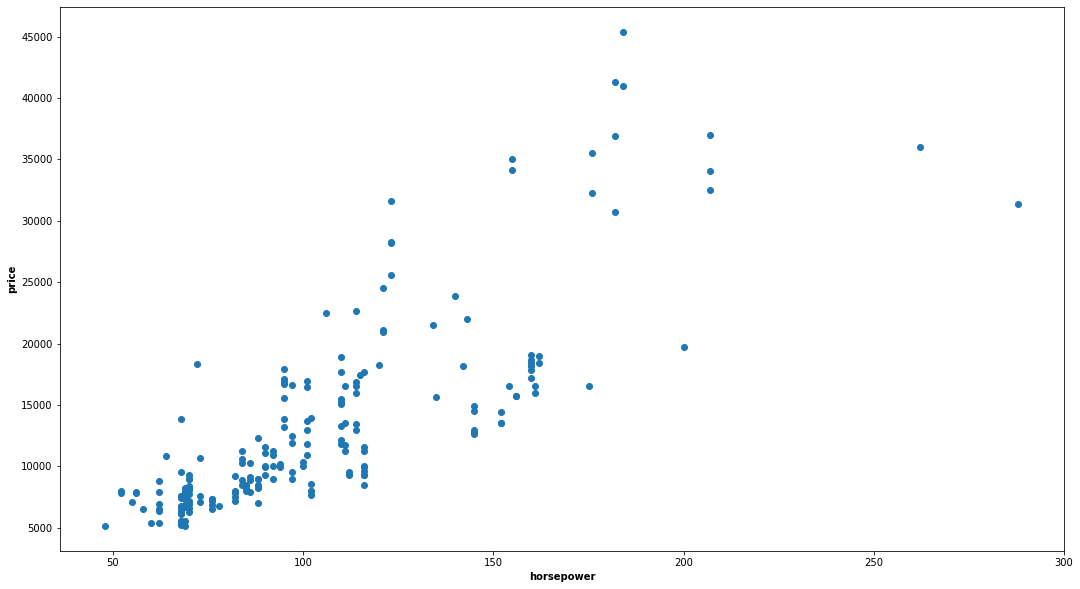

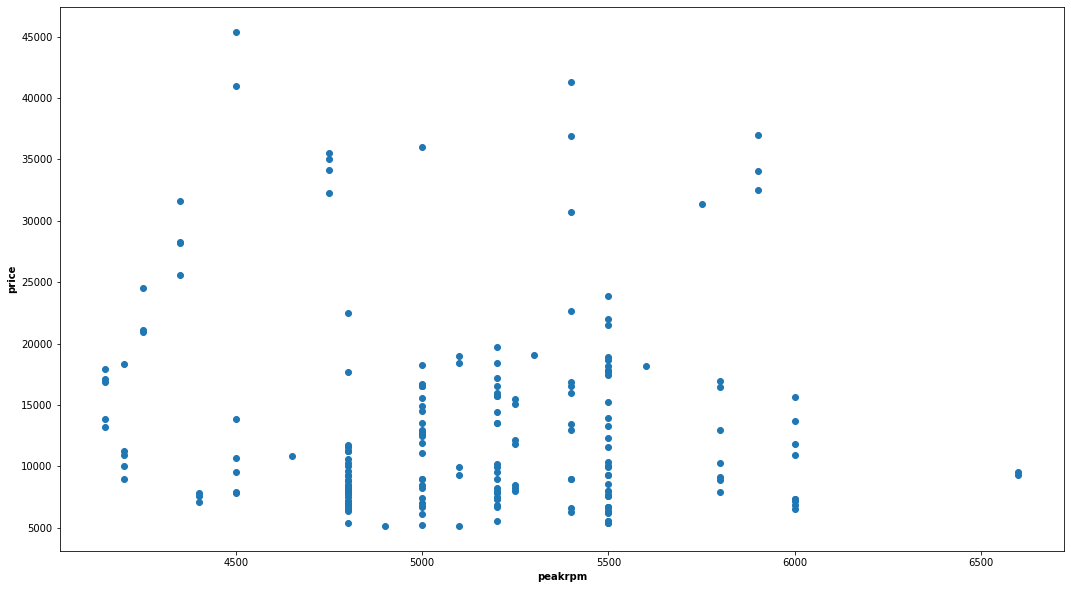

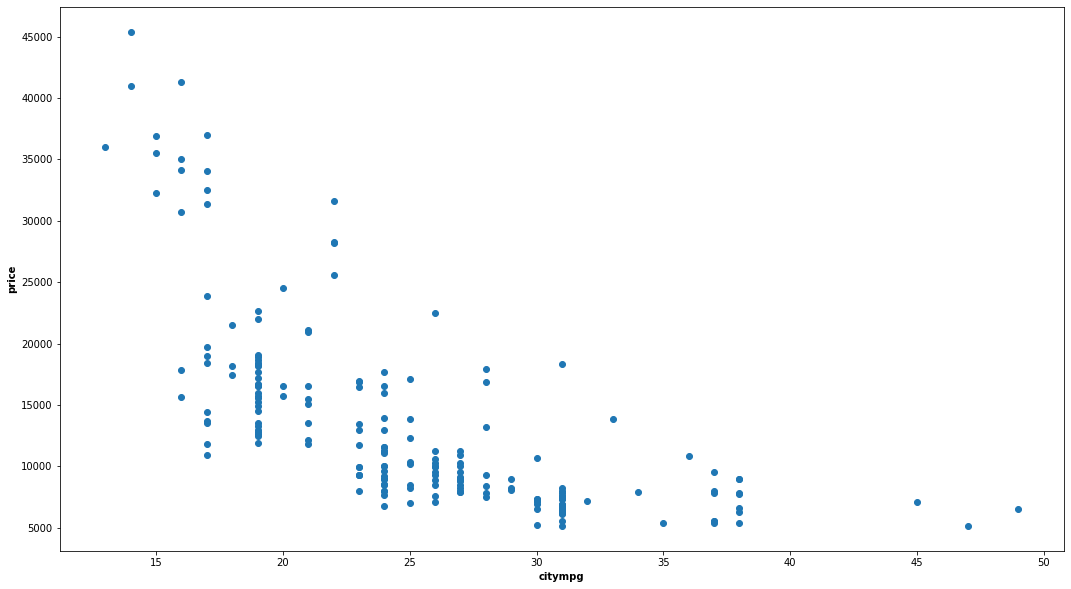

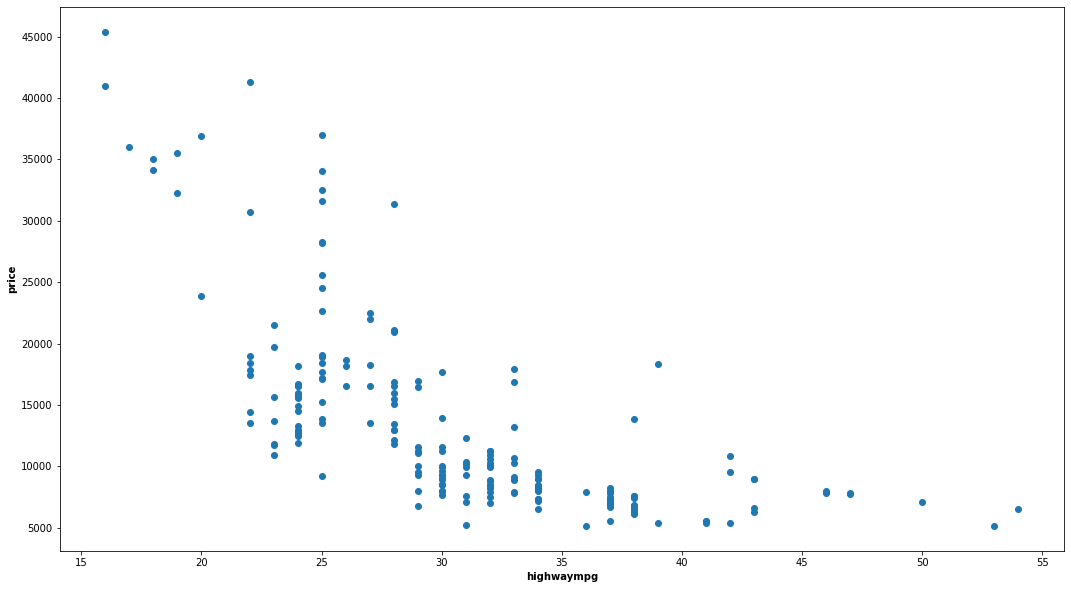

In [61]:
for column in continous_data.columns:
    plt.figure(figsize=(18,10))
    plt.scatter(x=continous_data[column],y=df["price"])
    plt.xlabel(str(column),fontweight="bold")
    plt.ylabel("price",fontweight="bold")
  


* **From the above Scatter plots properties like peakrpm,compressionratio,stroke are less correlated with Price. Hence we can drop them.**

In [62]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [63]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [64]:
df=df.drop(["car_ID","CarName","symboling","fuelsystem","stroke","compressionratio","peakrpm"],axis=1)

In [65]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,111,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,154,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,102,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,114,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,160,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,134,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,106,26,27,22470.0


* **Converting the categorical data to numerical data using get_dummies() function.**

In [66]:
df=pd.get_dummies(data=df,columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber"])

In [67]:
df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28,...,0,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,160,19,25,...,0,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,134,18,23,...,0,1,0,0,0,0,1,0,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,106,26,27,...,0,0,0,0,0,0,1,0,0,0


**Independent variable=X**

In [68]:
X=df.drop(["price"],axis=1)

In [69]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28,...,0,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,160,19,25,...,0,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,134,18,23,...,0,1,0,0,0,0,1,0,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,106,26,27,...,0,0,0,0,0,0,1,0,0,0


**Dependent varibale=y**

In [70]:
y=df["price"]

In [71]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

**Scaling the Independent data using StandardScaler() function**

In [72]:
scaler=StandardScaler()

In [73]:
X=scaler.fit_transform(X)

In [74]:
X

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.070014  ,
        -0.070014  , -0.14106912],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.070014  ,
        -0.070014  , -0.14106912]])

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p >Prediction using Linear Regression Model</p>

</div>


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)

(153, 40)
(52, 40)


In [77]:
y_train

90      7099.0
173     8948.0
93      7349.0
5      15250.0
167     8449.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 153, dtype: float64

In [78]:
lr=LinearRegression()

**Fit the model**

In [79]:
lr.fit(X_train,y_train)

LinearRegression()

**Predicted values**

In [80]:
y_predictions=lr.predict(X_test)

In [81]:
y_predictions.shape

(52,)

In [82]:
y_test.shape

(52,)

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p >Performance Check</p>

</div>

**Accuracy on train data**

In [83]:
accuracy_traindata=lr.score(X_train,y_train)

In [84]:
accuracy_traindata

0.9342150859307063

* **Accuaracy on train data is 93.4 %**

**Accuracy on test data**

In [85]:
accuracy_testdata=lr.score(X_test,y_test)

In [86]:
accuracy_testdata

0.859244084667572

* **Accuaracy on test data is 85.9 %**

**Mean Squared Error**

In [87]:
MSE=mean_squared_error(y_test,y_predictions)

**Mean Absolute Error**

In [88]:
MAE=mean_absolute_error(y_test,y_predictions)

**R Squared**

In [89]:
R_squared=metrics.r2_score(y_test,y_predictions)

In [90]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

**Adjusted R squared**

In [91]:
Adjusted_r_squared=model.rsquared_adj

In [92]:
MSE

9523480.044716489

In [93]:
MAE

2185.5677084820095

In [94]:
R_squared

0.859244084667572

* **R_squared with the value of 0.85 it indicates good model for predicting the target value.**

In [95]:
Adjusted_r_squared

0.9086597427937704

* **Adjusted_r_squared close to 1, it indicates that model perfectly predicts the target values that is PRICE of the car.**